In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# Load the dataset
df = pd.read_csv('churn.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
# Overview of data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Summary statistics for numeric columns
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Check for missing values in the dataset
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# How many unique values in each column (to detect categorical variables)
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# Count of churn vs non-churn
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

C:\Users\SHIVSHARAN A\AppData\Local\Temp\ipykernel_27632\3684714889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='pastel')


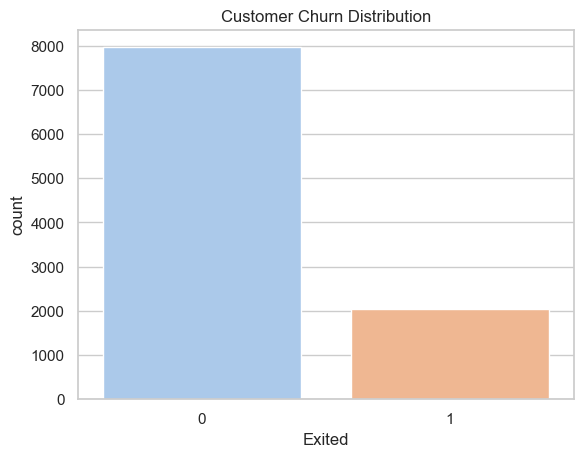

In [9]:
# Bar plot of churn distribution
sns.countplot(data=df, x='Exited', palette='pastel')
plt.title("Customer Churn Distribution")
plt.show()


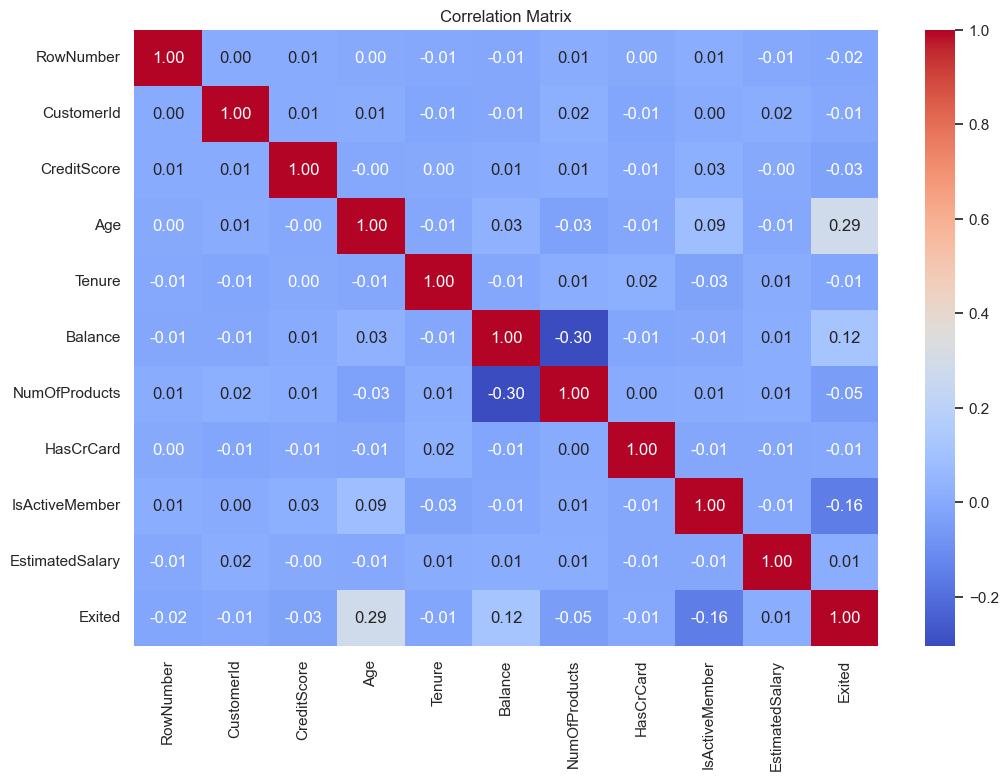

In [11]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['Surname', 'Geography', 'Gender']
Numerical Columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


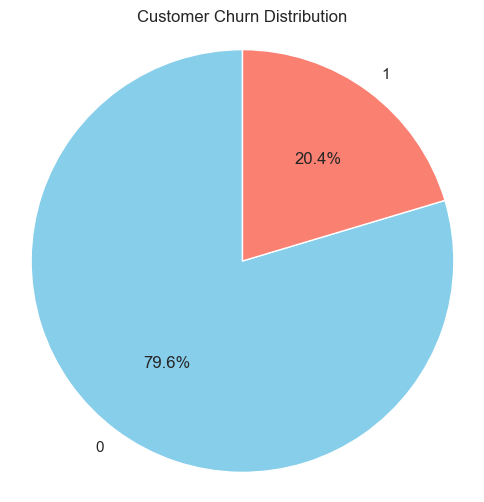

In [12]:
# Pie chart for Churn vs Non-Churn
churn_counts = df['Exited'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()


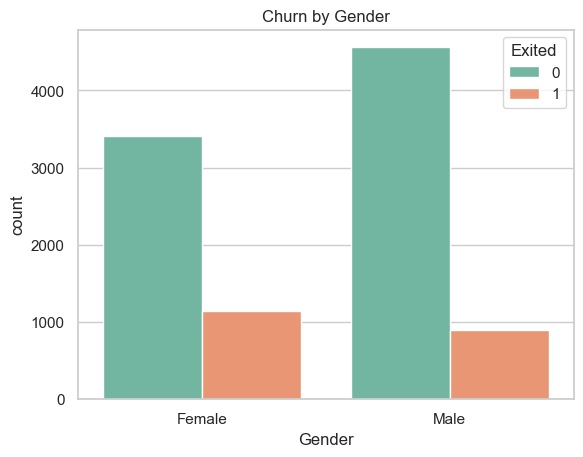

In [13]:
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set2')
plt.title('Churn by Gender')
plt.show()


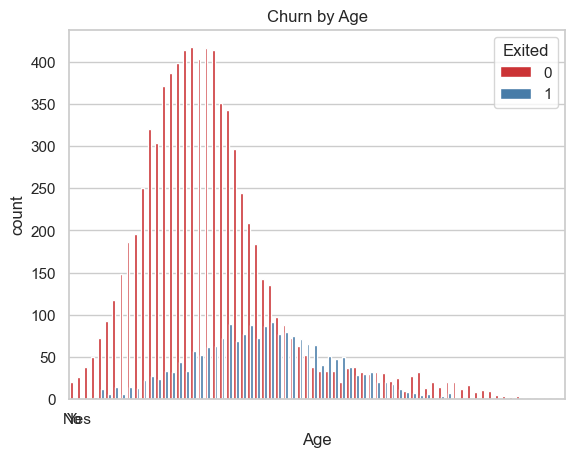

In [14]:
sns.countplot(data=df, x='Age', hue='Exited', palette='Set1')
plt.title('Churn by Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

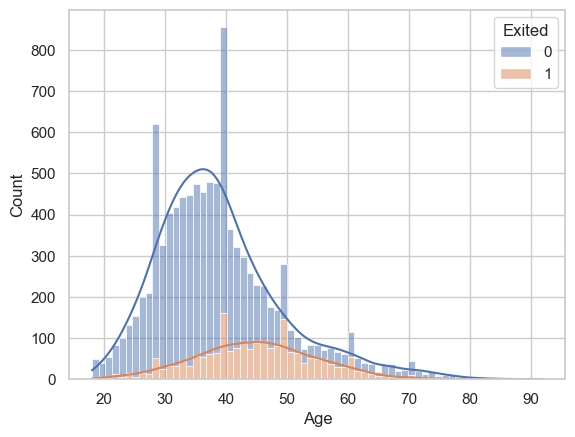

In [15]:
#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Exited", multiple="stack",kde=True)

<Axes: xlabel='Exited', ylabel='CreditScore'>

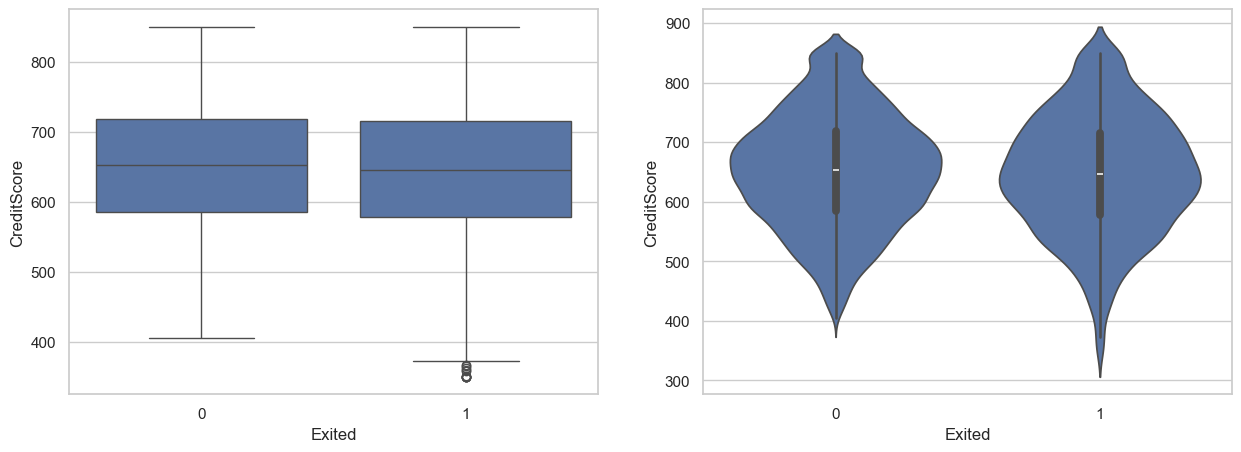

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Exited", y="CreditScore", data=df, ax=ax[0])
sns.violinplot(x="Exited", y="CreditScore", data=df, ax=ax[1])

<Axes: xlabel='Tenure', ylabel='count'>

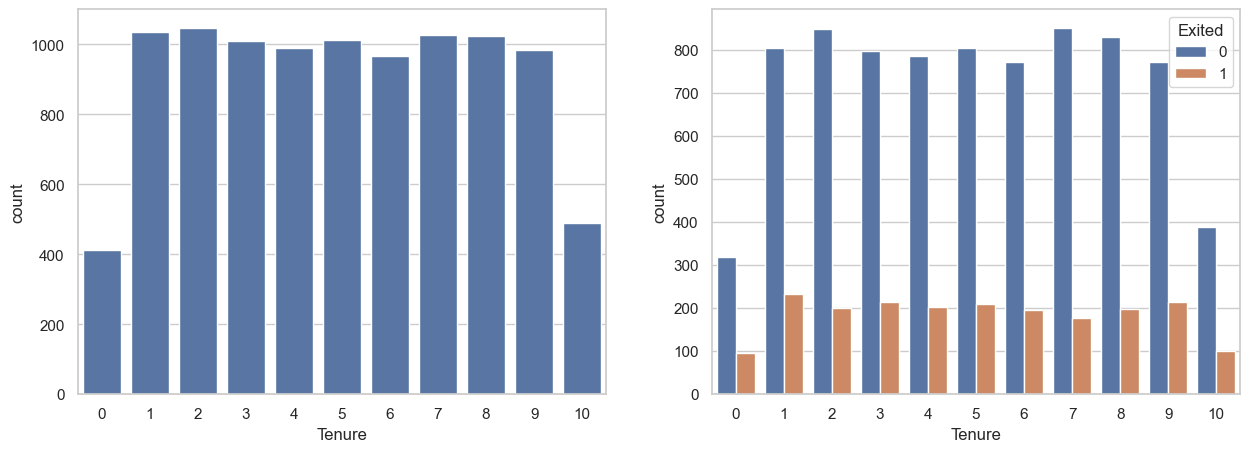

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Exited', data=df,ax=ax[1])

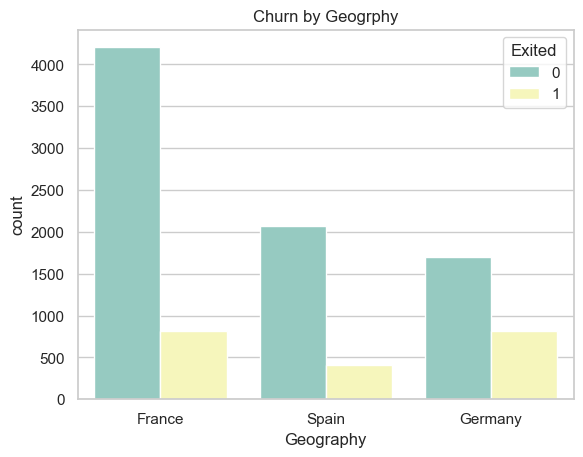

In [18]:
sns.countplot(data=df, x='Geography', hue='Exited', palette='Set3')
plt.title('Churn by Geogrphy')
plt.show()


<Axes: xlabel='IsActiveMember', ylabel='count'>

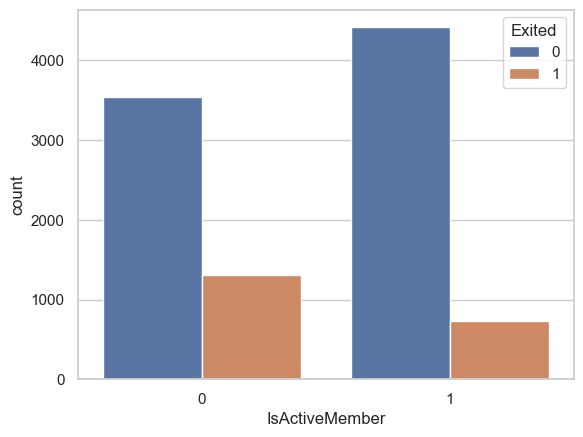

In [19]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

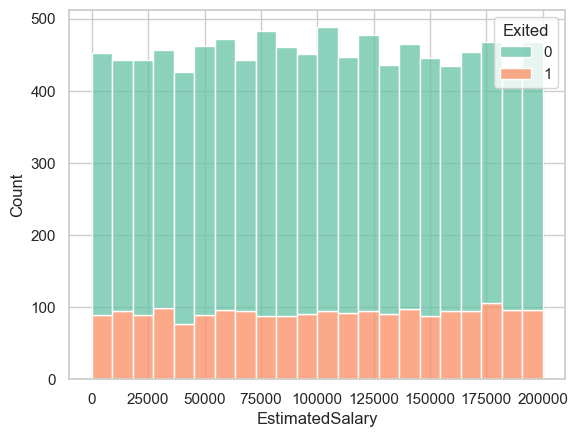

In [20]:
sns.histplot(data=df,x='EstimatedSalary',hue='Exited',multiple='stack',palette='Set2')

C:\Users\SHIVSHARAN A\AppData\Local\Temp\ipykernel_27632\219898557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='EstimatedSalary', palette='Oranges')


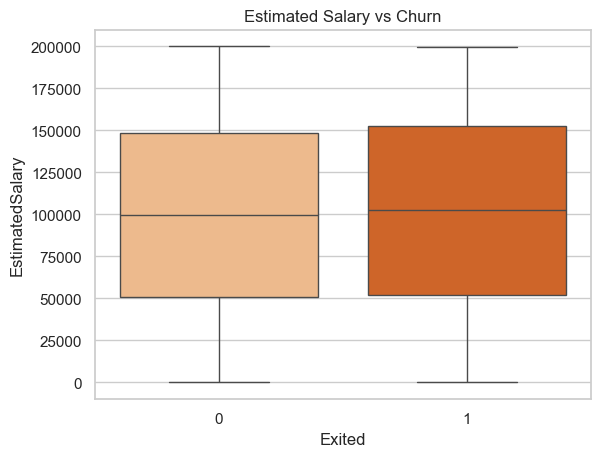

In [21]:
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', palette='Oranges')
plt.title('Estimated Salary vs Churn')
plt.show()


In [22]:
# Drop customerID if it exists
df = df.drop(columns=['customerId'], errors='ignore')


# Convert 'Churn' to binary (Yes = 1, No = 0)
df['Exited'] = df['Exited'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False


In [23]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Exited',axis=1),df['Exited'],test_size=0.3,random_state=42)

In [24]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 2. Load the data
df = pd.read_csv("churn.csv")

# 3. Encode categorical variables if needed
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# 5. Split the data into features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"✅ Random Forest Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


✅ Random Forest Accuracy: 86.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

